### Refs
- [RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [PubChem](https://pubchem.ncbi.nlm.nih.gov/) - find SDF files for molecules
- [YouTube Tutorial](https://www.youtube.com/watch?v=NozaWUkJ3YM)

### Workflow Suggestions
> After modifying classes from `src` directory, **Restart NoteBook Kernel** is required 
- Recommended action after changing files in `src`: Restart -> Run All

## Imports

In [1]:
from src.loader import SDFLoader
from src.core.molecule import MBMolecule
from src.utils.renderer import Renderer
from src.utils.ui import Theme
from rdkit.Chem import Mol


## RDkit Diamag Calcs


In [2]:
SDF_TEST = [
    {
        'sdf_file': 'chlorobenzene.sdf',
        'expected_diamag': -72.19
    },
    {
        'sdf_file': 'chalconatronate.sdf',
        'expected_diamag': -313.4
    },
    {
        'sdf_file': 'PhAsarsenate-Hphoshpate_Cr4+.sdf',
        'expected_diamag': -9999999
    },
]

[INF] chlorobenzene.sdf: Diamag OK - "chlorobenzene.sdf": -72.1900


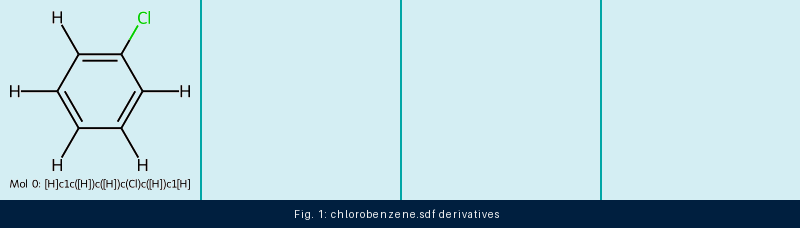

[ERR] chalconatronate.sdf: ❌ result -10.46 is not expected value: -313.4


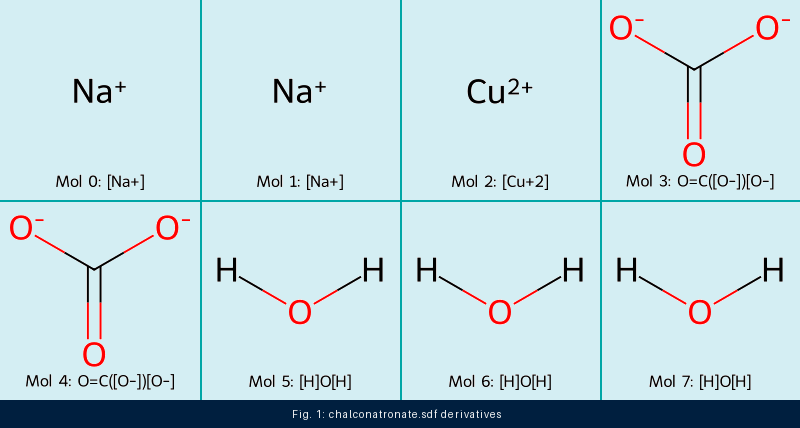

[ERR] PhAsarsenate-Hphoshpate_Cr4+.sdf: ❌ result -47.63 is not expected value: -9999999


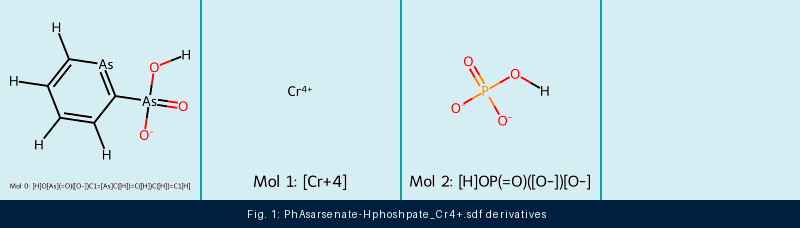

In [3]:
"""Loop through SDF test cases / files"""
for test_case in SDF_TEST:
    # Load all MBMolecule instances from the given SDF file
    mols: list[MBMolecule] = SDFLoader.Load(test_case['sdf_file'])

    # Compute total diamagnetic contribution across all molecules
    # TODO:: Not yet sure how to deal with calculating diamag 
    #        loaded from SDF files with more than 1 molecule
    sum_dia_contr = 0
    for mol in mols:
        sum_dia_contr += mol.CalcDiamagContr(verbose=False)   # silent accumulation
        result = mol.CalcDiamagContr()                        # last computed molecule result

    # Validation and reporting
    try:
        # Check that computed result matches expected reference value
        assert round(result, 2) == test_case["expected_diamag"]
        print(f"[INF] {test_case['sdf_file']}: Diamag OK - \"{test_case['sdf_file']}\": {sum_dia_contr:.4f}")

    except Exception as e:
        # Log failure with computed vs expected values
        print(f"[ERR] {test_case['sdf_file']}: ❌ result {round(result, 2)} is not expected value: {test_case['expected_diamag']}")
    
    # Print Molecules in current SDF File
    rdkit_mols: list[Mol] = [mol.ToRDKit() for mol in mols]
    display(Renderer(Theme.Sea).GetMoleculesGridImg(rdkit_mols, label=f"Fig. 1: {test_case['sdf_file']} derivatives\n"))

